# Car Price Analysis and Simple Linear Regression

## Overview
This notebook explores a car dataset and fits a simple linear regression model (using a custom `relations` module) to predict Selling Price from Present Price. It includes exploratory visualizations and a gradient-descent training workflow.


- imports (`relations` as `rl`, matplotlib, pandas, seaborn, etc.)

In [2]:
import relations as rl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns


## Goals
- Visualize relationships between features (pairplot).
- Split data into training and testing sets.
- Fit a linear model with gradient descent to predict `Selling_Price` from `Present_Price`.
- Visualize training/testing points and the learned regression line.
- Print trained parameters and evaluate predictions.


## How to run
1. Ensure `car data.csv` is present in the working directory.
2. Run cells in order (0 → 3 → 4 → 5 → ...). The imports and data loading must run before visualizations and model training.
3. Adjust `Lr` and `epochs` in Cell 7 to tune training behavior.
4. Inspect outputs: pairplot, scatter plots, printed parameters, and any metrics/plots produced by `rl.predictions`.

## Notes
- The model currently uses `Present_Price` as the independent variable (x) and `Selling_Price` as the dependent variable (y).
- The `relations` module (`rl`) provides `gradient_descent` and `predictions`; ensure it's available and working.
- For clearer plots, consider adding axis labels, legends, and saving figures as needed.

- load data (`data = pd.read_csv('car data.csv')`)

In [3]:
data=pd.read_csv('car data.csv')

- exploratory pairplot (`sns.pairplot(data)`)

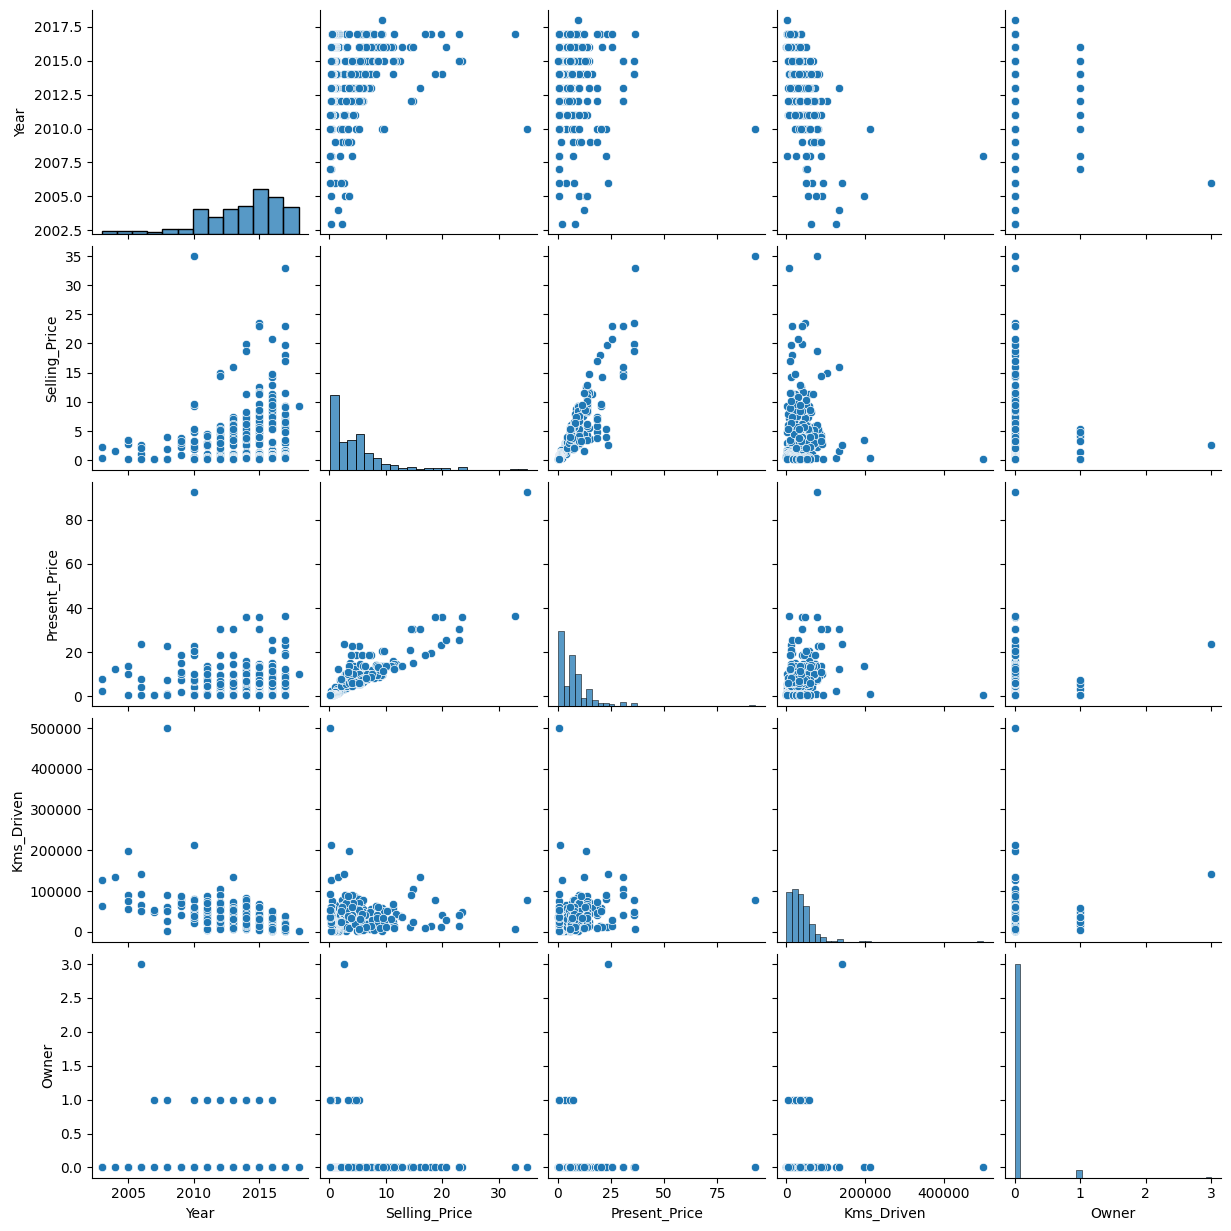

In [4]:
sns.pairplot(data)

## Correlation: Selling Price vs Present Price

- Observed relationship: the scatterplot and pairplot show a clear positive linear relationship between  Present_Price(x) and Selling_Price (y).
- Interpretation: higher selling prices are associated with higher selling prices.


## Dataset
- Source file: `car data.csv`
- Key columns used in this notebook: `Selling_Price`, `Present_Price`


- create train/test split and assign x/y

In [13]:
train_data=data.sample(frac=0.8,random_state=200)
x_train=train_data['Present_Price']
y_train=train_data['Selling_Price']

test_data=data.drop(train_data.index)
x_test=test_data['Present_Price']
y_test=test_data['Selling_Price']


- scatter plot of training data

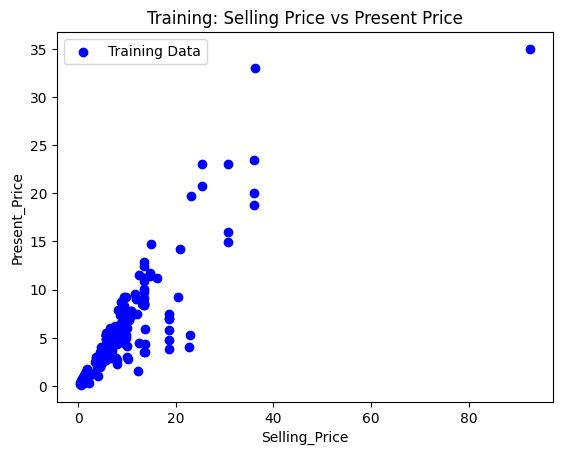

In [14]:
plt.scatter(x_train,y_train,color='blue',label='Training Data')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.title('Training: Selling Price vs Present Price')
plt.legend()


- set learning rate and epochs (`Lr`, `epochs`)

In [15]:
Lr=0.0001 #how much to change the weights at each iteration
epochs=1000 #number of times to iterate through the entire dataset

- run gradient descent (`a, b = rl.gradient_descent(...)`)

In [16]:
a,b=rl.gradient_descent(x_train,y_train,Lr,epochs)

Iteration 0: MSE=47.535754736841554, a=0.015663221045643154, b=0.0009438623689738084
Iteration 100: MSE=6.318984270384958, a=0.5253103437264692, b=0.03806126229537418
Iteration 200: MSE=6.1731319138715515, a=0.5542099711461902, b=0.04904101534877714
Iteration 300: MSE=6.164039510025951, a=0.555389792654364, b=0.058413756060603436
Iteration 400: MSE=6.155592734090814, a=0.5549764626313857, b=0.06759532188722242
Iteration 500: MSE=6.147336626044396, a=0.554476678579701, b=0.07666847615621886
Iteration 600: MSE=6.1392655630500155, a=0.5539772726305175, b=0.08563908950417232
Iteration 700: MSE=6.131375399728194, a=0.5534831920560803, b=0.09450858569283914
Iteration 800: MSE=6.1236620818829515, a=0.5529946623998726, b=0.10327811979634259
Iteration 900: MSE=6.1161216458260546, a=0.5525116375705689, b=0.11194881930069353
Iteration 600: MSE=6.1392655630500155, a=0.5539772726305175, b=0.08563908950417232
Iteration 700: MSE=6.131375399728194, a=0.5534831920560803, b=0.09450858569283914
Iteration

- print trained parameters

In [17]:
print("Trained parameters: a =",a," b =",b)

Trained parameters: a = 0.5520388055435581  b = 0.1204365484468615


- evaluate/predict on test set (`rl.predictions(...)`)

In [18]:
rl.predictions(x_test,y_test,a,b)

For x=9.54, predicted y=5.386886753332406, actual y=4.75
For x=4.15, predicted y=2.4113975914526278, actual y=2.85
For x=8.12, predicted y=4.602991649460553, actual y=6.75
For x=8.61, predicted y=4.873490664176897, actual y=6.5
For x=7.21, predicted y=4.100636336415915, actual y=2.25
For x=7.15, predicted y=4.067514008083302, actual y=1.95
For x=30.61, predicted y=17.018344386135176, actual y=23.0
For x=19.77, predicted y=11.034243734043004, actual y=18.0
For x=15.04, predicted y=8.423100183821974, actual y=3.6
For x=14.68, predicted y=8.224366213826293, actual y=5.5
For x=30.61, predicted y=17.018344386135176, actual y=14.5
For x=23.73, predicted y=13.220317403995494, actual y=2.5
For x=6.76, predicted y=3.852218873921314, actual y=4.75
For x=18.64, predicted y=10.410439883778784, actual y=17.0
For x=20.45, predicted y=11.409630121812624, actual y=9.65
For x=2.37, predicted y=1.4287685175850942, actual y=1.35
For x=1.9, predicted y=1.169310278979622, actual y=1.05
For x=0.87, predicte

- scatter test data and plot regression line

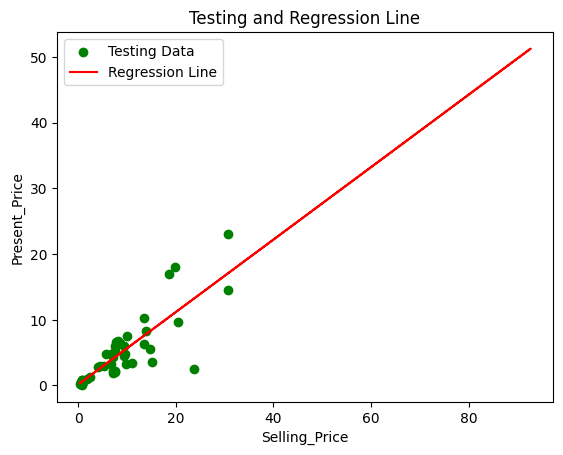

In [19]:
plt.scatter(x_test,y_test,color='green',label='Testing Data')
plt.plot(x_train, a*x_train + b, color='red', label='Regression Line')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.title('Testing and Regression Line')
plt.legend()